In [2]:
# not usable on the long run as it's too long to query data
# doesn't generate errors which make the algo not error friendly
# not possible to ask with a "period" flag

In [3]:
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,5)
from utils import Timer
import yfinance as yf
ALPHAVANTAGE_API_KEY = "E2S9WCQXMIMBMR61"

/Users/nielsou/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
# Retrieving tickers symbols

# stocks
stock_list = pd.read_csv('data_finance/stocks.csv')['symbol_yf'].tolist()
# index
index_csv = pd.read_csv('data_finance/index.csv')
pref_index = ['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225']
index_list = index_csv[index_csv['symbol_yf'].isin(['^DJI','^IXIC','^FCHI', '^FTSE', '^STOXX50E', '^HSI', '^N225'])]['symbol_yf'].tolist()
# currency
currency_list = pd.read_csv('data_finance/currencies.csv')['symbol_yf'].tolist()

[*********************100%***********************]  15 of 15 completed
[Import performance with yfinance lib:]
Elapsed: 0.9237141609191895


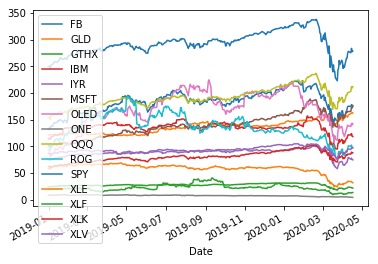

In [5]:
# yfinance import

with Timer.Timer("Import performance with yfinance lib:"): 
    data = yf.download(stock_list, start='2019-1-1', thread = 1)
    data['Close'].plot()

[Import performance with pandas_datareader lib:]
Elapsed: 9.145253896713257


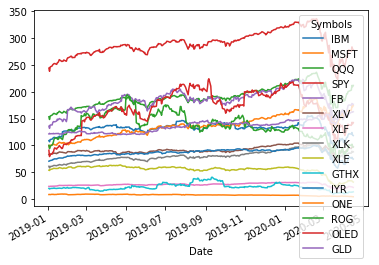

In [6]:
# pandas_datareader import

with Timer.Timer("Import performance with pandas_datareader lib:"): 
    data = web.DataReader(stock_list, data_source='yahoo', start='2019-1-1')
    data['Adj Close'].plot()

In [9]:
# pandas_datareader import
with Timer.Timer("Import performance with pandas_datareader lib:"): 
    stockList = web.DataReader('MSFT', data_source='av-daily', start='2019-1-1', api_key=ALPHAVANTAGE_API_KEY)

[Import performance with pandas_datareader lib:]
Elapsed: 1.5763142108917236


In [ ]:
with Timer.Timer("Import performance with pandas_datareader FRED:"): 
    jpy = web.DataReader('DEXJPUS', 'fred')
    jpy.plot()

In [ ]:
data

In [16]:
# ce morceau de code ne fonctionne pas
ticker = web.DataReader(["AAPL", "TSLA"], data_source='av-daily',  start='2019-1-1', api_key=ALPHAVANTAGE_API_KEY)

In [17]:
ticker

,open,high,low,close,volume
2019-01-02,306.10,315.1300,298.8000,310.12,11658648
2019-01-03,307.00,309.4000,297.3800,300.36,6965184
2019-01-04,306.00,318.0000,302.7300,317.69,7394116
2019-01-07,321.72,336.7400,317.7508,334.96,7551225
2019-01-08,341.96,344.0100,327.0200,335.35,7008516
...,...,...,...,...,...
2020-04-08,554.20,557.2081,533.3300,548.84,12656024
2020-04-09,562.09,575.1818,557.1100,573.00,13650000
2020-04-13,590.16,652.0000,580.5300,650.95,22475421
2020-04-14,698.97,741.8800,692.4300,709.89,30576511


In [20]:
data = web.DataReader('^VXAZN', data_source='yahoo', start='2019-1-1', api_key=ALPHAVANTAGE_API_KEY)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-16,50.869999,49.75,49.900002,50.869999,0,50.869999


In [22]:
data = web.DataReader('VXIBMCLS', data_source='fred', start='2010-1-1')
data

,VXIBMCLS
DATE,
2010-06-01,31.08
2010-06-02,27.64
2010-06-03,27.04
2010-06-04,31.56
2010-06-07,32.83
...,...
2020-04-09,53.76
2020-04-10,NaN
2020-04-13,52.76
